Problem Set 2, Problem 2: Geometric Transformations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Part a)

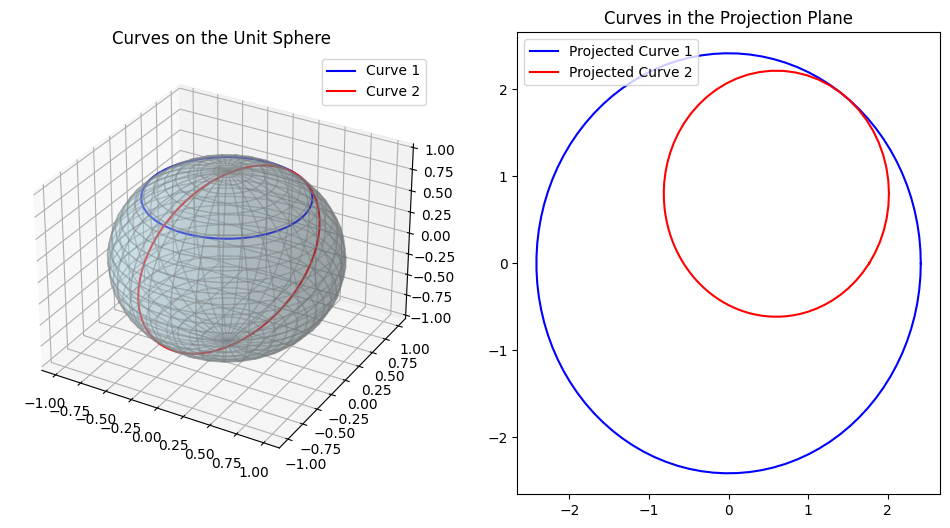

Average angle on the sphere: 27.65 degrees
Average angle in the projection plane: 27.60 degrees


In [29]:
# Stereographic projection function
def stereographic_projection(x, y, z):
    denom = 1 - z
    
    # Initialize the projected coordinates as NaN
    x_proj = np.full_like(x, np.nan, dtype=float)
    y_proj = np.full_like(y, np.nan, dtype=float)
    
    # Only perform the projection where the denominator is non-zero
    mask = denom != 0  # Create a mask for non-zero denominators
    x_proj[mask] = x[mask] / denom[mask]  # Apply projection where denom is non-zero
    y_proj[mask] = y[mask] / denom[mask]  # Apply projection where denom is non-zero
    
    return x_proj, y_proj

# Function to generate the unit sphere mesh
def generate_sphere_mesh(theta_steps=30, phi_steps=30):
    theta = np.linspace(0, np.pi, theta_steps)  # Latitude (from -pi/2 to pi/2)
    phi = np.linspace(0, 2*np.pi, phi_steps)    # Longitude (from 0 to 2*pi)
    theta, phi = np.meshgrid(theta, phi)
    
    # Parametric equations for the unit sphere
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)
    
    return x, y, z, theta, phi

x, y, z, theta, phi = generate_sphere_mesh()

# Define a line of latitude (e.g., theta = pi/4)
t = np.linspace(0, 2 * np.pi, 100)
curve1_x = np.sin(np.pi / 4) * np.cos(t)  # Latitude curve at θ = π/4
curve1_y = np.sin(np.pi / 4) * np.sin(t)
curve1_z = np.cos(np.pi / 4) * np.ones_like(t)

# Define a second curve
curve2_x = np.cos(t)
curve2_y = np.sin(t)
curve2_z = (3* curve2_x + 4 * curve2_y) / 5

magnitude = np.sqrt(curve2_x**2 + curve2_y**2 + curve2_z**2)
curve2_x /= magnitude
curve2_y /= magnitude
curve2_z /= magnitude

# Project curves using stereographic projection
curve1_proj_x, curve1_proj_y = stereographic_projection(curve1_x, curve1_y, curve1_z)
curve2_proj_x, curve2_proj_y = stereographic_projection(curve2_x, curve2_y, curve2_z)

# Compute tangent vectors on the sphere
curve1_tangent = np.gradient(np.column_stack([curve1_x, curve1_y, curve1_z]), axis=0)
curve2_tangent = np.gradient(np.column_stack([curve2_x, curve2_y, curve2_z]), axis=0)

# Compute tangent vectors in the projection plane
curve1_proj_tangent = np.gradient(np.column_stack([curve1_proj_x, curve1_proj_y]), axis=0)
curve2_proj_tangent = np.gradient(np.column_stack([curve2_proj_x, curve2_proj_y]), axis=0)

# Compute angles between tangents on the sphere
dot_product_sphere = np.einsum('ij,ij->i', curve1_tangent, curve2_tangent)
norm_curve1 = np.linalg.norm(curve1_tangent, axis=1)
norm_curve2 = np.linalg.norm(curve2_tangent, axis=1)
angles_sphere = np.arccos(dot_product_sphere / (norm_curve1 * norm_curve2))

# Compute angles between tangents in the projection plane
dot_product_proj = np.einsum('ij,ij->i', curve1_proj_tangent, curve2_proj_tangent)
norm_curve1_proj = np.linalg.norm(curve1_proj_tangent, axis=1)
norm_curve2_proj = np.linalg.norm(curve2_proj_tangent, axis=1)
angles_proj = np.arccos(dot_product_proj / (norm_curve1_proj * norm_curve2_proj))

# Plot the curves on the sphere
fig = plt.figure(figsize=(12, 6))
ax3d = fig.add_subplot(121, projection='3d')
ax3d.plot_surface(x, y, z, color='lightblue', alpha=0.3, edgecolor='grey')
ax3d.plot(curve1_x, curve1_y, curve1_z, label='Curve 1', color='b')
ax3d.plot(curve2_x, curve2_y, curve2_z, label='Curve 2', color='red')
ax3d.set_title('Curves on the Unit Sphere')
ax3d.legend()

# Plot the curves in the projection plane
ax2 = fig.add_subplot(122)
ax2.plot(curve1_proj_x, curve1_proj_y, label='Projected Curve 1', color='b')
ax2.plot(curve2_proj_x, curve2_proj_y, label='Projected Curve 2', color='r')
ax2.set_title('Curves in the Projection Plane')
ax2.legend()

plt.show()

# Print comparison of angles
print("Average angle on the sphere: {:.2f} degrees".format(np.degrees(np.mean(angles_sphere))))
print("Average angle in the projection plane: {:.2f} degrees".format(np.degrees(np.mean(angles_proj))))

Part b)

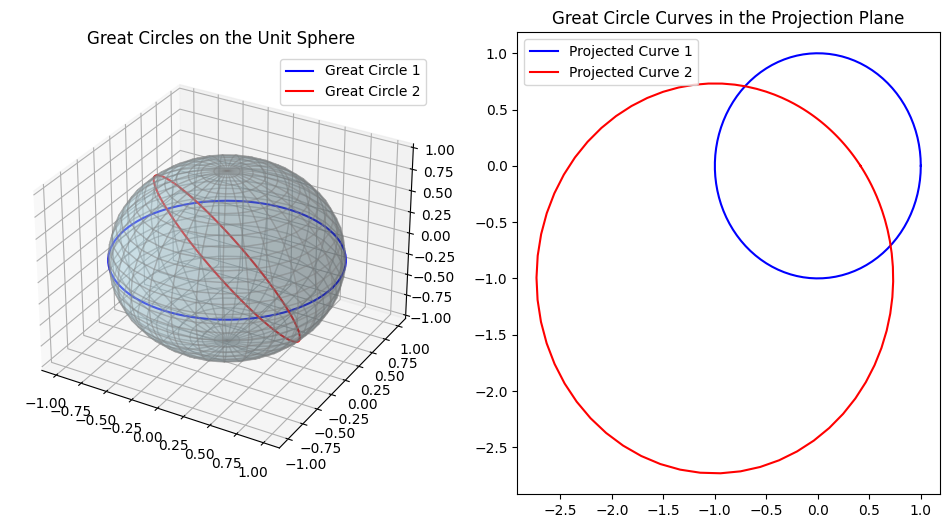

Average angle on the sphere: 32.86 degrees
Average angle in the projection plane: 32.80 degrees


In [35]:
# Stereographic projection function
def stereographic_projection(x, y, z):
    denom = 1 - z
    
    # Initialize the projected coordinates as NaN
    x_proj = np.full_like(x, np.nan, dtype=float)
    y_proj = np.full_like(y, np.nan, dtype=float)
    
    # Only perform the projection where the denominator is non-zero
    mask = denom != 0  # Create a mask for non-zero denominators
    x_proj[mask] = x[mask] / denom[mask]  # Apply projection where denom is non-zero
    y_proj[mask] = y[mask] / denom[mask]  # Apply projection where denom is non-zero
    
    return x_proj, y_proj

# Function to generate the unit sphere mesh
def generate_sphere_mesh(theta_steps=30, phi_steps=30):
    theta = np.linspace(0, np.pi, theta_steps)  # Latitude (from -pi/2 to pi/2)
    phi = np.linspace(0, 2*np.pi, phi_steps)    # Longitude (from 0 to 2*pi)
    theta, phi = np.meshgrid(theta, phi)
    
    # Parametric equations for the unit sphere
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)
    
    return x, y, z, theta, phi

x, y, z, theta, phi = generate_sphere_mesh()

# Define a line of latitude (e.g., theta = pi/4)
t = np.linspace(0, 2 * np.pi, 100)
curve1_x = np.sin(np.pi/2) * np.cos(t)  # Latitude curve at θ = π/4
curve1_y = np.sin(np.pi/2) * np.sin(t)
curve1_z = np.cos(np.pi/2) * np.ones_like(t)

# Define a second curve
curve2_x = np.cos(t)
curve2_y = np.sin(t)
curve2_z = -(1* curve2_x + 1 * curve2_y) / 1

magnitude = np.sqrt(curve2_x**2 + curve2_y**2 + curve2_z**2)
curve2_x /= magnitude
curve2_y /= magnitude
curve2_z /= magnitude

# Project curves using stereographic projection
curve1_proj_x, curve1_proj_y = stereographic_projection(curve1_x, curve1_y, curve1_z)
curve2_proj_x, curve2_proj_y = stereographic_projection(curve2_x, curve2_y, curve2_z)

# Compute tangent vectors on the sphere
curve1_tangent = np.gradient(np.column_stack([curve1_x, curve1_y, curve1_z]), axis=0)
curve2_tangent = np.gradient(np.column_stack([curve2_x, curve2_y, curve2_z]), axis=0)

# Compute tangent vectors in the projection plane
curve1_proj_tangent = np.gradient(np.column_stack([curve1_proj_x, curve1_proj_y]), axis=0)
curve2_proj_tangent = np.gradient(np.column_stack([curve2_proj_x, curve2_proj_y]), axis=0)

# Compute angles between tangents on the sphere
dot_product_sphere = np.einsum('ij,ij->i', curve1_tangent, curve2_tangent)
norm_curve1 = np.linalg.norm(curve1_tangent, axis=1)
norm_curve2 = np.linalg.norm(curve2_tangent, axis=1)
angles_sphere = np.arccos(dot_product_sphere / (norm_curve1 * norm_curve2))

# Compute angles between tangents in the projection plane
dot_product_proj = np.einsum('ij,ij->i', curve1_proj_tangent, curve2_proj_tangent)
norm_curve1_proj = np.linalg.norm(curve1_proj_tangent, axis=1)
norm_curve2_proj = np.linalg.norm(curve2_proj_tangent, axis=1)
angles_proj = np.arccos(dot_product_proj / (norm_curve1_proj * norm_curve2_proj))

# Plot the curves on the sphere
fig = plt.figure(figsize=(12, 6))
ax3d = fig.add_subplot(121, projection='3d')
ax3d.plot_surface(x, y, z, color='lightblue', alpha=0.3, edgecolor='grey')
ax3d.plot(curve1_x, curve1_y, curve1_z, label='Great Circle 1', color='b')
ax3d.plot(curve2_x, curve2_y, curve2_z, label='Great Circle 2', color='red')
ax3d.set_title('Great Circles on the Unit Sphere')
ax3d.legend()

# Plot the curves in the projection plane
ax2 = fig.add_subplot(122)
ax2.plot(curve1_proj_x, curve1_proj_y, label='Projected Curve 1', color='b')
ax2.plot(curve2_proj_x, curve2_proj_y, label='Projected Curve 2', color='r')
ax2.set_title('Great Circle Curves in the Projection Plane')
ax2.legend()

plt.show()

# Print comparison of angles
print("Average angle on the sphere: {:.2f} degrees".format(np.degrees(np.mean(angles_sphere))))
print("Average angle in the projection plane: {:.2f} degrees".format(np.degrees(np.mean(angles_proj))))

Part c)

/tmp/ipykernel_72093/2882926727.py:23: RuntimeWarning: invalid value encountered in scalar divide
  return np.array([x / (1 - z), y / (1 - z)])
/tmp/ipykernel_72093/2882926727.py:37: RuntimeWarning: invalid value encountered in divide
  tangent_vector = tangent_vector / np.linalg.norm(tangent_vector)


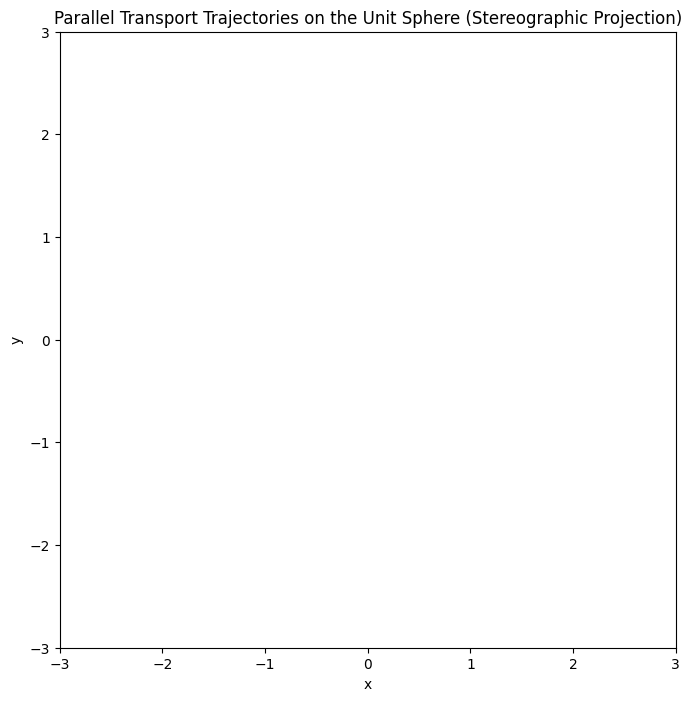

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Unit-speed parametrization of a great circle (parametric equation for a great circle)
def great_circle(t, axis=[0, 0, 1]):
    """
    Parametric equation of a great circle on the unit sphere
    axis: axis of rotation, default is the z-axis
    t: parameter (angle)
    """
    x = np.cos(t) * axis[0] + np.sin(t) * axis[1]
    y = np.cos(t) * axis[1] - np.sin(t) * axis[0]
    z = np.sqrt(1 - x**2 - y**2)
    return np.array([x, y, z])

# Stereographic projection from unit sphere to the plane
def stereographic_projection(p):
    """
    Stereographic projection of a point on the unit sphere to the plane.
    p: point on the sphere (x, y, z)
    """
    x, y, z = p
    return np.array([x / (1 - z), y / (1 - z)])

# Compute parallel transport along a great circle
def parallel_transport(initial_vector, t_values, great_circle_points):
    """
    Compute parallel transport along a great circle.
    initial_vector: initial tangent vector
    t_values: array of parameter values
    great_circle_points: points on the great circle
    """
    vectors = []
    for t, point in zip(t_values, great_circle_points):
        # The tangent vector at a point on the circle is perpendicular to the position vector
        tangent_vector = np.cross(point, initial_vector)
        tangent_vector = tangent_vector / np.linalg.norm(tangent_vector)
        
        # Move the vector along the circle (this is simplified, just rotating)
        transported_vector = np.cross(point, tangent_vector)
        transported_vector = transported_vector / np.linalg.norm(transported_vector)
        
        vectors.append(transported_vector)
        initial_vector = transported_vector  # update initial vector for next step
    return np.array(vectors)

# Parameters
t_values = np.linspace(0, 2*np.pi, 500)
initial_vectors = [np.array([1, 0, 0]), np.array([0, 1, 0]), np.array([0, 0, 1])]  # Initial vectors for transport
axis_of_rotation = [0, 0, 1]  # Great circle around z-axis

# Generate great circle points
great_circle_points = np.array([great_circle(t, axis=axis_of_rotation) for t in t_values])

# Plotting
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the great circle
for point in great_circle_points:
    stereographic_point = stereographic_projection(point)
    ax.plot(stereographic_point[0], stereographic_point[1], 'bo', markersize=1)

# Parallel transport for each initial vector
colors = ['r', 'g', 'b']
for initial_vector, color in zip(initial_vectors, colors):
    transported_vectors = parallel_transport(initial_vector, t_values, great_circle_points)
    
    # Plot parallel transport trajectories in the stereographic projection
    for transported_vector in transported_vectors:
        stereographic_point = stereographic_projection(transported_vector)
        ax.plot(stereographic_point[0], stereographic_point[1], color=color, lw=1)

# Set axis limits
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])

# Labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Parallel Transport Trajectories on the Unit Sphere (Stereographic Projection)')

plt.gca().set_aspect('equal', adjustable='box')
plt.show()

Part d)

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Stereographic projection from unit sphere to the plane
def stereographic_projection(p):
    """
    Stereographic projection of a point on the unit sphere to the plane.
    p: point on the sphere (x, y, z)
    """
    x, y, z = p
    return np.array([x / (1 - z), y / (1 - z)])

# Compute the inner product between two vectors
def inner_product(v1, v2):
    return np.dot(v1, v2)

# Generate two vectors on the unit sphere
v1 = np.array([1, 0, 0])  # Example vector 1
v2 = np.array([0, 1, 0])  # Example vector 2

# Apply stereographic projection to the vectors
v1_proj = stereographic_projection(v1)
v2_proj = stereographic_projection(v2)

# Compute the inner product on the unit sphere
inner_product_sphere = inner_product(v1, v2)

# Compute the inner product after the stereographic projection
inner_product_plane = inner_product(v1_proj, v2_proj)

# Output inner products
print(f"Inner product on the sphere: {inner_product_sphere}")
print(f"Inner product after stereographic projection: {inner_product_plane}")

# Plotting the vectors and their projections
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the vectors on the unit sphere (represented as points on the unit circle in 2D)
ax.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='r', label='v1 (sphere)')
ax.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='b', label='v2 (sphere)')

# Plot the stereographic projections
ax.quiver(0, 0, v1_proj[0], v1_proj[1], angles='xy', scale_units='xy', scale=1, color='r', linestyle='dashed', label='v1 (proj)')
ax.quiver(0, 0, v2_proj[0], v2_proj[1], angles='xy', scale_units='xy', scale=1, color='b', linestyle='dashed', label='v2 (proj)')

# Set axis limits
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])

# Add labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Vectors and their Stereographic Projections')

# Add legend
ax.legend()

# Display the plot
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.show()

Inner product on the sphere: 0
Inner product after stereographic projection: 0.0


ValueError: At least one value in the dash list must be positive

<Figure size 800x800 with 1 Axes>